In [ ]:
#Installing MediaPipe

!pip install mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.9/33.9 MB 37.7 MB/s eta 0:00:00
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 120.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 127.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 113.4 MB/s eta 0:00:00
  Using cached flatbuffers-23.5.9-py2.py3-none-any.whl (26 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 MB 44.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 46.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 92.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.3/300.3 kB 97.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 100.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 106.7 MB/s eta 0:00:00


### Using MediaPipe with Python for pose-estimation on static images

In [ ]:
#Importing all necessary dependencies
import cv2
import mediapipe as mp
import numpy as np
# from google.colab.patches import cv2_imshow


#Creating a class for PoseEstimation
class PoseEstimation :
    def __init__(self) :

        # Initialize mediapipe drawing class - to draw the landmarks points.
        self.mp_drawing = mp.solutions.drawing_utils
        # Initializing styles for landmarks and connections
        self.mp_drawing_styles = mp.solutions.drawing_styles
        # Initialize mediapipe pose class.
        self.mp_pose = mp.solutions.pose

    #findPosition is a helper function which we will use later
    def findPosition(self,img ,draw=True):

        #Create an empty list called lmlist
        lmList = []

        #Check if a human pose has been detected by the model
        if self.results.pose_landmarks:

            #Looping through the landmarks
            for id, lm in enumerate(self.results.pose_landmarks.landmark):

                #h, w, and c are the height, width and channels of the input image
                h, w, c = img.shape

                # cx and cy are actual x and y coordinates of each landmark, caclulated by the multiplying the normalized values of x and y coordinates with the width and height of the image
                cx, cy = int(lm.x * w), int(lm.y * h)

                # Append landmark id and its x and y coordinates to the list
                lmList.append([id, cx, cy])

        return lmList


    def pose_estimation(self, img_path) :

        # Setup the Pose function for video processing.
        # Minimum confidence value (between 0 and 1) from the pose-detection model for the detection to be considered successful.
        # Minimum confidence value (between 0 and 1) from the pose-tracking model for the landmarks to be considered tracked successfully
        with self.mp_pose.Pose(
            min_detection_confidence=0.5,
            min_tracking_confidence=0.5) as pose:

            # Read the image using opencv
            self.image = cv2.imread(img_path)

            # Make a copy of the image
            before_image = self.image.copy()

            # Making the image writeable
            #self.image.flags.writeable = False

            # Converting the image from BGR to RGB format for pose-estimation(OpenCV uses BGR format while MediaPipe uses RGB format)
            self.image = cv2.cvtColor(self.image, cv2.COLOR_BGR2RGB)

            #Get the coordinates of all the landmarks
            self.results = pose.process(self.image)

            # Making the image writeable
            self.image.flags.writeable = True

            # Converting the image back to BGR format for drawing pose annotations
            self.image = cv2.cvtColor(self.image, cv2.COLOR_RGB2BGR)

            # Draw the pose annotation on the image.
            # pose_landmarks returns the coordinates of all the landmarks
            # POSE_CONNECTIONS returns the coordinates of the connections between the landmarks
            self.mp_drawing.draw_landmarks(
                self.image,
                self.results.pose_landmarks,
                self.mp_pose.POSE_CONNECTIONS,
                landmark_drawing_spec=self.mp_drawing_styles.get_default_pose_landmarks_style())

            #return the image before and after pose estimation
            return [before_image, self.image]


2023-05-17 17:08:06.636853: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Create a function to plot images before and after pose estimation using matplotlib

In [ ]:
# Importing necessary dependencies
import matplotlib.pyplot as plt


def plot_mediapipe(before_image, after_image) :

  #Create a new figure using matplotlib
  fig = plt.figure(figsize=(10, 7))

  #add a subplot
  fig.add_subplot(1, 2, 1)

  #Plot the input image on the left
  plt.imshow(cv2.cvtColor(before_image, cv2.COLOR_BGR2RGB), cmap = "gray")
  # Enabling axis and labels
  plt.axis('On')
  # Setting title as Before
  plt.title("Before")

  #add a subplot
  fig.add_subplot(1, 2, 2)

  #Plot the output image on the right
  plt.imshow(cv2.cvtColor(after_image, cv2.COLOR_BGR2RGB), cmap = "gray")
  # Enabling axis and labels
  plt.axis('On')
  # Setting title as After
  plt.title("After")

  # Show the figure
  plt.show()


### Download some sample images for pose-estimation

In [ ]:
#Download samples

!gdown 1WOuUP53cBgOycErlq5f_ewVa5PMRTzZj
!gdown 1_k1DSZN59VkVsyzzdX7xCfdSM3BO34Qs
!gdown 1Wnq7fb3D0fMsiRGgG_NDxbezDx3GNeM4

Downloading...
From: https://drive.google.com/uc?id=1WOuUP53cBgOycErlq5f_ewVa5PMRTzZj
To: /content/pose_estimation1.jpg
100% 61.4k/61.4k [00:00<00:00, 71.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1_k1DSZN59VkVsyzzdX7xCfdSM3BO34Qs
To: /content/pose_estimation_2.png
100% 284k/284k [00:00<00:00, 131MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Wnq7fb3D0fMsiRGgG_NDxbezDx3GNeM4
To: /content/pose_estimation_3.png
100% 128k/128k [00:00<00:00, 141MB/s]


### Create an object of the PoseEstimation class

In [ ]:
ps = PoseEstimation()

#Saving image paths
img_path1 = '/content/pose_estimation1.jpg'
img_path2 = '/content/pose_estimation_2.png'
img_path3 = '/content/pose_estimation_3.png'


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
/root/miniconda3/lib/python3.10/site-packages/google/protobuf/symbol_database.py:78: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


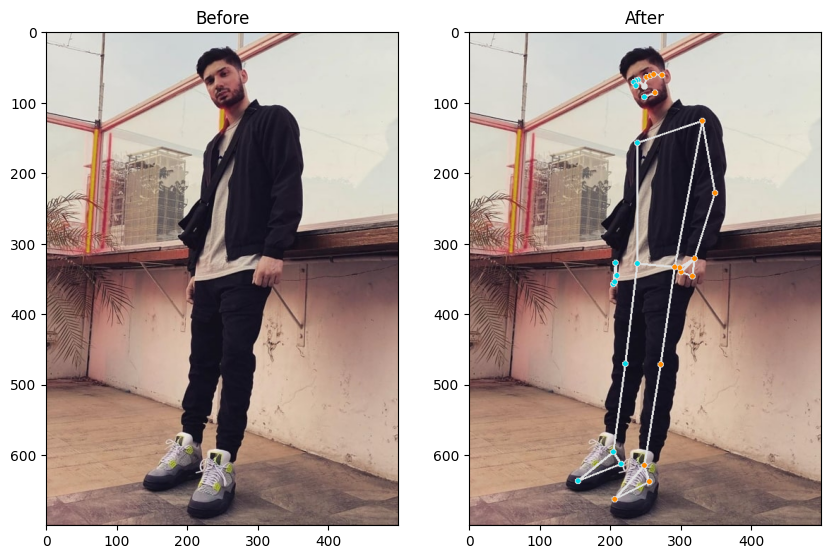

In [ ]:
#Plot sample image 1
[before_image, after_image ] = ps.pose_estimation(img_path1)
plot_mediapipe(before_image, after_image)

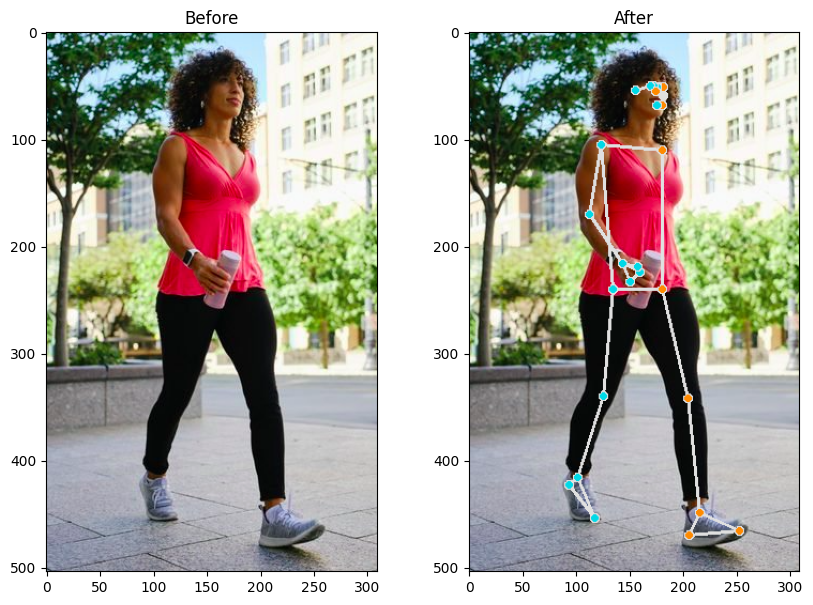

In [ ]:
#Plot sample image 2
[before_image, after_image ] = ps.pose_estimation(img_path2)
plot_mediapipe(before_image, after_image)

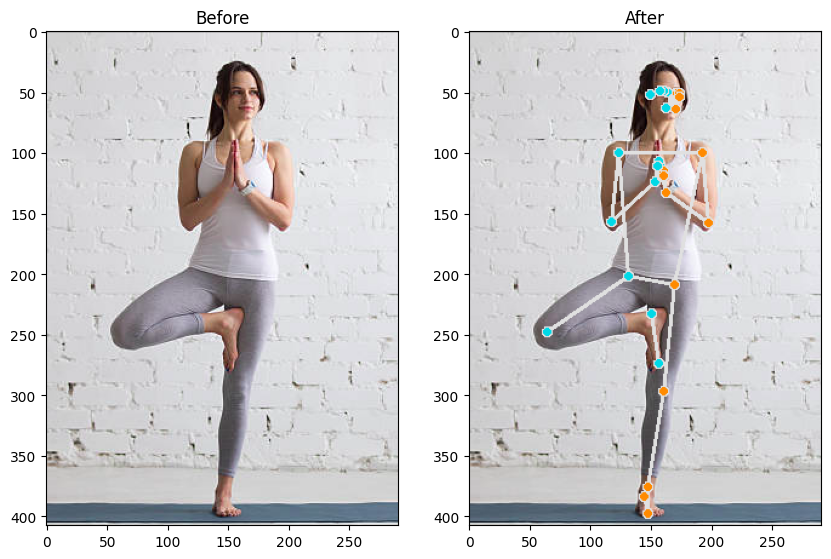

In [ ]:
#Plot sample image 3
[before_image, after_image ] = ps.pose_estimation(img_path3)
plot_mediapipe(before_image, after_image)

### Using MediaPipe to check if an image is full-shot or not

In [ ]:
#Importing all necessary dependencies
import cv2
import mediapipe as mp
import numpy as np
# from google.colab.patches import cv2_imshow



class PoseEstimation :
    def __init__(self) :

        self.mp_pose = mp.solutions.pose                            # Initialize mediapipe pose class.
        self.mp_drawing = mp.solutions.drawing_utils                # Initialize mediapipe drawing class - to draw the landmarks points.
        self.mp_drawing_styles = mp.solutions.drawing_styles        # Initializing styles for landmarks and connections

    def findPosition(self,img ,draw=True):                          # The findPosition function here makes a list of lists containing data in the format : [landmark, x-coordinate, y-coordinate]

        #Create an empty list called lmlist
        self.lmList = []

        #Check if a human pose has been detected by the model
        if self.results.pose_landmarks:

            #Looping through the landmarks
            for id, lm in enumerate(self.results.pose_landmarks.landmark):

                #h, w, and c are the height, width and channels of the input image
                h, w, c = img.shape

                # cx and cy are actual x and y coordinates of each landmark, caclulated by the multiplying the normalized values of x and y coordinates with the width and height of the image
                cx, cy = int(lm.x * w), int(lm.y * h)

                # Append landmark id and its x and y coordinates to the list
                self.lmList.append([id, cx, cy])

        return self.lmList

    #The is_full_shot function checks if a given image is a full-shot image of a human or not
    def is_full_shot(self) :


        try :
          #Making sure that x-coordinate of each target landmark(1,4,29,30) is less than the width of the image
          if 0<= self.lmList[1][1] <= self.image.shape[1] and 0<= self.lmList[4][1] <= self.image.shape[1] and 0<= self.lmList[29][1] <= self.image.shape[1] and 0<= self.lmList[30][1] <= self.image.shape[1]  :

              #Making sure that y-coordinate of each target landmark(1,4,29,30) is less than the height of the image
              if 0<= self.lmList[1][2] <= self.image.shape[0] and 0<= self.lmList[4][1] <= self.image.shape[1] and 0<= self.lmList[29][2] <= self.image.shape[0] and 0<= self.lmList[30][2] <= self.image.shape[0] :

                  #Making sure that the distance between the pair of landmarks 1 and 29 and 4 and 30 should be greater than a threshold(width of the image)
                  if abs(self.lmList[1][2] - self.lmList[29][2]) > self.image.shape[1] and abs(self.lmList[4][2] - self.lmList[30][2]) > self.image.shape[1]  :

                      return True                                    # Return True if the input image passes all the checks

        except :
          pass

        return False                                                 # Return False if the input image doesn't pass all the checks



    def pose_estimation(self, img_path) :

        # Setup the Pose function for video processing.
        with self.mp_pose.Pose(                                     # Initialize mediapipe drawing class - to draw the landmarks points.
            min_detection_confidence=0.5,                           # Minimum confidence value (between 0 and 1) from the pose-detection model for the detection to be considered successful.
            min_tracking_confidence=0.5) as pose:                   # Minimum confidence value (between 0 and 1) from the pose-tracking model for the landmarks to be considered tracked successfully

            # Read the image using opencv
            self.image = cv2.imread(img_path)

            # Make a copy of the image
            before_image = self.image.copy()

            # Converting the image from BGR to RGB format for pose-estimation(OpenCV uses BGR format while MediaPipe uses RGB format)
            self.image = cv2.cvtColor(self.image, cv2.COLOR_BGR2RGB)

            # Get the coordinates of all the landmarks
            self.results = pose.process(self.image)

            # Using the findPosition function to get an array of all the cordinates
            self.lmList = self.findPosition(self.image)

            # Making the image writeable
            self.image.flags.writeable = True

            # Converting the image back to BGR format for drawing pose annotations
            self.image = cv2.cvtColor(self.image, cv2.COLOR_RGB2BGR)

            # Draw the pose annotation on the image.
            self.mp_drawing.draw_landmarks(
                self.image,
                self.results.pose_landmarks,                      # pose_landmarks returns the coordinates of all the landmarks
                self.mp_pose.POSE_CONNECTIONS,                    # POSE_CONNECTIONS returns the coordinates of the connections between the landmarks
                landmark_drawing_spec=self.mp_drawing_styles.get_default_pose_landmarks_style())

            if self.is_full_shot() :
              print("Image is full-shot \n")
              return [True, before_image, self.image]
            else:
              print("Image is not full-shot \n")
              return [False, before_image, self.image]

            #return the image before and after pose estimation



### Download some sample images

In [ ]:
!gdown 1FvRCaGJMRsWZcYGjQX0GLHPyPIr9CGlA
!gdown 1kQ-E4Mt8KHLLCjfW0u06H1v85Q3-If2u

### Create an object of the PoseEstimation class

In [ ]:
ps = PoseEstimation()

#Saving image paths
img_path1 = '/content/non_full_shot.jpg'
img_path2 = '/content/full_shot.jpg'

Image is not full-shot 



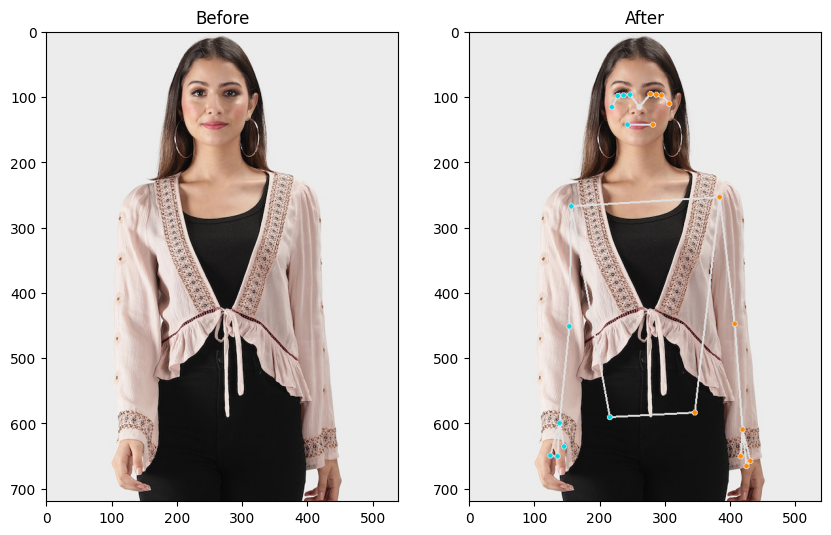

In [ ]:
#Plot sample image 1
[full_shot, before_image, after_image ] = ps.pose_estimation(img_path1)
plot_mediapipe(before_image, after_image)


Image is full-shot 



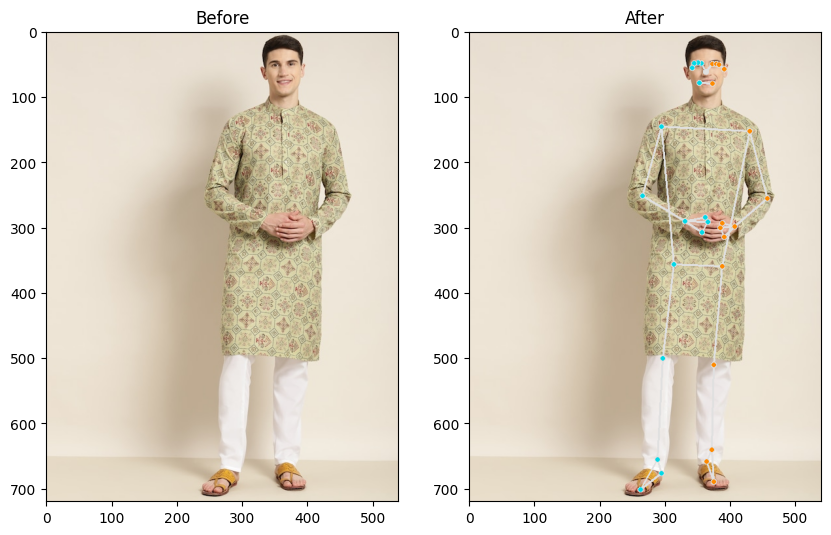

In [ ]:
#Plot sample image 2
[full_shot, before_image, after_image ] = ps.pose_estimation(img_path2)
plot_mediapipe(before_image, after_image)

So far, I have created a PoseEstimation class which can differentiate between full-shot and non full-shot images. I'll use this class in future while collecting image data from the web.

In [ ]:
# Installing selenium
!pip install selenium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 50.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 384.9/384.9 kB 59.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 25.9 MB/s eta 0:00:00


Now I will create a MyntraScraper class which will help me to scrape images as well as other attributes like name, title etc. from Myntra

In [ ]:
#Importing all necessary dependencies
from selenium import webdriver
import time
import os
import urllib.request
import json
import json

import warnings
warnings.filterwarnings("ignore")



class MyntraScraper :
    def __init__(self, n_items = 5) :
        self.n_items = n_items

        # Path to ChromeDriver (link : https://chromedriver.chromium.org/)
        self.driver_path = PATH_TO_DRIVER
        # Path to your browser
        browser_path = PATH_TO_BROWSER

        # Customize and configure ChromeDriver session
        self.option = webdriver.ChromeOptions()
        # set Browser Binary location
        self.option.binary_location = browser_path

        # Initialize the Chrome driver object for web scraping
        self.driver = webdriver.Chrome(executable_path=self.driver_path, chrome_options=self.option)

        # Initialize a dictionary to store metadata about the images
        self.metadata={'link':[], 'title':[], 'name':[], 'price':[], 'category' : [], 'sex' : [] }
        # List containing all the categories of clothing accessories we will be working on
        self.CATEGORIES = ["topwear", "bottomwear", "footwear", "eyewear", "handbag"]
        self.links = []
        # Creating an object of the PoseEstimation class
        self.ps = PoseEstimation()
    # main function to scrape data
    def scrape(self, url) :
        # Open the website in the given URL
        self.driver.get(url)

        # Looping between different categories
        for category in self.CATEGORIES :
             # Count the no. of images already present in the data folder
            count = len(os.listdir(os.path.join("data", "Product",category)))
            # Printing the no. of images already present in the data folder
            print("Initial images : {}".format(count))
            # Prining the no. of new images to be scraped
            print("{} new images will be scraped".format(self.n_items - count))

            # Enter text(name of category) in the search bar click to retrieve search results
            self.driver.find_element_by_class_name('desktop-searchBar').send_keys(category)
            # Click the search button to retrieve results
            self.driver.find_element_by_class_name('desktop-submit').click()



            # Run the loop if the no. of images currently present is less than the no. if images required.
            while count < self.n_items :

                # The following code fetches all the product links() on the response page and looks for the NEXT-> button,
                # and if it exists, it goes to the next page and repeats the procedure or else, halts the driver connection.
                for product_base in self.driver.find_elements_by_class_name('product-base') :

                    try :
                        # Fetch the link of the product
                        new_link = product_base.find_element_by_xpath('./a').get_attribute("href")
                        # Proceed if the link is not already added in the dataset
                        if new_link not in self.links :

                             # Use the get_info() function to fetch attributes like name, price, sex etc.
                            if self.get_info(new_link, category) :
                                # Add the link to the dataset
                                self.links.append(new_link)
                                # Increase the count by 1
                                count += 1

                            # If the no. of images exceed the required amount, break the loop
                            if count >= self.n_items :
                                break
                    except :
                        pass

                try :
                     # Click on the NEXT button if it exists
                    self.driver.find_element_by_class_name('pagination-next').click()
                except :
                    break

         # Create a JSON object of the metadata dictionary
        json_object = json.dumps(self.metadata, indent = 4)

        # Store data from the 'metadata' dictionary in a JSON file names metadata.json
        with open('data/metadata.json', 'w') as outfile :
            outfile.write(json_object)

        # Close the driver session
        self.driver.close()
        # Terminate the Chrome driver object
        self.driver.quit()


    # This is a helper function used to fetch attributes like name, price, sex etc from the given product link
    def get_info(self, link, category) :

        try :
            pdp_link = link
            pdp_driver = webdriver.Chrome(executable_path=self.driver_path, chrome_options=self.option)                                 # Initialize a new Chrome driver object for web scraping
            pdp_driver.get(link)                                                                                                        # Open the product URL

            title = pdp_driver.find_element_by_class_name('pdp-title').get_attribute("innerHTML")                                       # Fetch the title of the product from the URL
            name = pdp_driver.find_element_by_class_name('pdp-name').get_attribute("innerHTML")                                         # Fetch the name of the product from the URL
            price = pdp_driver.find_element_by_class_name('pdp-price').find_element_by_xpath('./strong').get_attribute("innerHTML")     # Fetch the price of the product from the URL
            image_tag = pdp_driver.find_elements_by_class_name('image-grid-image')[0]                                                   # Fetch the link of the first image in the product link

            Buffer_DIR = os.path.join("data", "Buffer" , name + ".jpg")                                                                 # Define the path of the image inside the 'Buffer' directory
            urllib.request.urlretrieve( image_tag.get_attribute('style').split("url(\"")[1].split("\")")[0], Buffer_DIR)                # Download the image and save it in the 'Buffer' directory

            if self.ps.driver(Buffer_DIR) :                                                                                             # Apply pose estimation on the image

                # If the image contains a full-shot image of a person, save it inside the 'Full_Shot' directory
                Full_Shot_DIR = os.path.join("data", "Full_Shot", name + ".jpg")
                urllib.request.urlretrieve( image_tag.get_attribute('style').split("url(\"")[1].split("\")")[0],Full_Shot_DIR)          # Download the image and save it in the 'Full_Shot' directory
                print("Full-Shot")

            else :

                # If the image doesn't containa a full-shot image of a person, save it inside the 'Product' directory
                Product_DIR = os.path.join("data", "Product" , category ,name + ".jpg")
                # Download the image and save it in the 'Product' directory
                urllib.request.urlretrieve( image_tag.get_attribute('style').split("url(\"")[1].split("\")")[0], Product_DIR)
                # Add the product link to the dataset
                self.metadata['link'].append(pdp_link)
                # Add the product title to the dataset
                self.metadata['title'].append(title)
                # Add the product name to the dataset
                self.metadata['name'].append(name)

                # Remove 'Rs.' from the price attribute(if present)
                price = price.lstrip('Rs.')
                # Remove '₹' from the price attribute(if present)
                price = price.lstrip('\u20b9')

                # Add the product price to the dataset
                self.metadata['price'].append(float(price))
                 # Add the product category to the dataset
                self.metadata['category'].append(category)

                # The following lines of code determines the sex of the product

                if 'women' in name.lower().split() :                            # Checks if 'Women' is in the product name or not
                    self.metadata['sex'].append('Women')                        # Assign category as 'Women'

                elif 'men' in name.lower().split() :                            # Checks if 'Men' is in the product name or not
                    self.metadata['sex'].append('Men')                          # Assign category as 'Men'

                elif 'unisex' in name.lower().split() :                         # Checks if 'Unisex' is in the product name or not
                    self.metadata['sex'].append('Unisex')                       # Assign category as 'Unisex'
                else:
                    self.metadata['sex'].append('N.A.')                         # Assign category as 'N.A.'

            os.remove(Buffer_DIR)                                               # Clean the 'Buffer' directory

            print(name + "\n")
            pdp_driver.close()                                                  # Close the new driver session
            pdp_driver.quit()                                                   # Terminate the new Chrome driver object

            return True                                                         # Return True if all attriibutes were fetched successfully

        except Exception as e:
            print(e)
            return False                                                        # Return False if all attriibutes were not fetched successfully



# Initialize the MyntraScraper class to retrieve 300 images per category
ms = MyntraScraper(n_items = 300)

# Scrape the myntra website
ms.scrape("https://www.myntra.com")


Congrats! Our dataset is ready. These are some samples of the data we scraped
<br> <br>

<img src='https://drive.google.com/uc?id=1wednRd2GzwXKwJPuWzV6HrHrDgCZA1nt'
height = 300> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<img src='https://drive.google.com/uc?id=1rs08acCtA-79fcCJLPkMcbK_SnAgSdWU'
height = 300>


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Topwear
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Bottomwear


<img src='https://drive.google.com/uc?id=1hbSOhjQP0OIaLBmJ7qFkVEvJlLpRDr3U'
height = 300>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<img src='https://drive.google.com/uc?id=1bZlQecrTTNdelhqBZ4YgchA--xAZmWhG'
height = 300>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Footwear &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Handbag



In [ ]:
#Importing all necessary dependencies

import pandas as pd
import numpy as np
import tensorflow as tf
import random
import cv2
# from google.colab.patches import cv2_imshow
from tqdm.auto import tqdm
import os
import shutil as sh
from IPython.display import Image, clear_output
import torch

/root/miniconda3/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


download a sample annotated dataset and use it for model training.

In [ ]:
!gdown 1RVTEUtBdwfu83oP_ddqikjwTrUKPPqIx
!unzip 'Annotated_Data.zip'


Downloading the ultralytics-yolov5 repository for training our custom YOLOv5s model.

In [ ]:
#Cloning the official YOLOv5 repository and other dependencies
!git clone https://github.com/ultralytics/yolov5
!pip install -U pycocotools

#Installing dependencies
!pip install -qr yolov5/requirements.txt
!cp yolov5/requirements.txt ./


Cloning into 'yolov5'...
remote: Enumerating objects: 15679, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 15679 (delta 1), reused 2 (delta 0), pack-reused 15672
Receiving objects: 100% (15679/15679), 14.45 MiB | 2.47 MiB/s, done.
Resolving deltas: 100% (10742/10742), done.
  Using cached pycocotools-2.0.6.tar.gz (24 kB)
  Installing build dependencies ... - \ | / - done
  Getting requirements to build wheel ... - done
  Preparing metadata (pyproject.toml) ... - done
  Created wheel for pycocotools: filename=pycocotools-2.0.6-cp310-cp310-linux_x86_64.whl size=102208 sha256=e188aa3e26764725e7392b55e9c335a9e3d9b2093f77722cc097ea0505c248c9
  Stored in directory: /root/.cache/pip/wheels/58/e6/f9/f87c8f8be098b51b616871315318329cae12cdb618f4caac93
Successfully built pycocotools


In [ ]:
# Fixing some dependency issues by reinstalling a specific stable version of PyTorch. You will need to restart your runtime after this.

!pip uninstall torch
!pip install torch==1.11.0+cu113 torchvision==0.12.0+cu113 torchaudio==0.11.0 --extra-index-url https://download.pytorch.org/whl/cu113

I can now begin training our custom YOLOv5s object detection model.

In [ ]:
#Training the model for 35 epochs on a batch-size of 16

!python yolov5/train.py --img 640 --batch 16 --epochs 35 --workers=1 --data /content/Annotated_Data/myntra.yaml

train: weights=yolov5/yolov5s.pt, cfg=, data=/content/Annotated_Data/myntra.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=35, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=1, project=yolov5/runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-168-gec2b853 Python-3.10.10 torch-2.0.1+cu117 CUDA:0 (NVIDIA A100 80GB PCIe, 81100MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, ancho

For data logging during model training, I will be using tensorboard.

In [ ]:
# We will be using tensorboard for data logging during model training
from tensorboard import notebook

%load_ext tensorboard
%tensorboard --logdir /content/yolov5/runs/train

notebook.display(port=6006, height=1000)

In [ ]:

# Converting the weights from .pt format to .onnx format( We'll be using the weights file in .onnx format for inference)

!python yolov5/export.py --weights  /content/yolov5/runs/train/exp/weights/best.pt --include onnx

I have now successfully trained our custom YOLOv5s model. I will now save the model weights and use it for inference

In [ ]:
# Downloading the exported weight
from google.colab import files
files.download('/content/yolov5/runs/train/exp/weights/best.onnx')

### Downloading the sample weights and classes files for performing inference on some test samples

In [ ]:
!gdown 1qlDVTB9MhtXLOWuS3lOT8z1b9J_Ws71Y
!unzip 'config.zip'

### Code for YOLOv5 inference on image input using OpenCV-DNN

In [ ]:
# Importing all necessary dependencies
import cv2
import time
import sys
import numpy as np
import os
# from google.colab.patches import cv2_imshow

# Defining width of image
INPUT_WIDTH = 640
# Defining height of image
INPUT_HEIGHT = 640

# Defining confidence threshold for object detection
CONFIDENCE_THRESHOLD = 0.4

# Making an array of all the categories
CATEGORIES = ["Topwear", "Bottomwear", "Footwear", "Eyewear", "Handbag"]

# Load the model using OpenCV
def build_model():
    # Load the custom YOLOv5
    net = cv2.dnn.readNet("/content/config/best.onnx")
    # Return the loaded model
    return net

# Performing Object Detection
def detect(image, net):
    # Converting the image to a blob
    #mean subtraction and scaling
    blob = cv2.dnn.blobFromImage(image, 1/255.0,
           (INPUT_WIDTH, INPUT_HEIGHT), swapRB=True, crop=False)
    # Set the blob as input to the network
    net.setInput(blob)
    # Get the predictions form the model
    preds = net.forward()
    # Return the predictions
    return preds

# Load the names of the classes
def load_classes():

    # Create an empty list for storing the names of the classes
    class_list = []
    # Open the config/classes.txt file(it contains the names of the classes)
    with open("/content/config/classes.txt", "r") as f:
        # Read the names of the classes from the classes.txt file
        class_list = [cname.strip() for cname in f.readlines()]
    # Return the names of the classes
    return class_list

# Run the load_classes() function
class_list = load_classes()

# Pre-Processing
def format_yolov5(frame):

    # Defining the no. of rows and columns in the ndarray representing the frame
    row, col, _ = frame.shape
    # Finding the maximum between row and column
    _max = max(col, row)
    # Initializing the result matrix with zeroes
    result = np.zeros((_max, _max, 3), np.uint8)
    # Copying the data from frame ndarray to result
    result[0:row, 0:col] = frame
    # Return the result
    return result

# Post-Processing
def wrap_detection(input_image, output_data):
    class_ids = []
    confidences = []
    boxes = []

    # Fetching the no. of rows in the output_data
    rows = output_data.shape[0]
    # Fetching the width and height of the input_image
    image_width, image_height, _ = input_image.shape
    # x-factor for resizing
    x_factor = image_width / INPUT_WIDTH
    # y-factor for resizing
    y_factor =  image_height / INPUT_HEIGHT


    # Iterate through the detections
    for r in range(rows):

        # Fetch the bounding box coordinates
        row = output_data[r]
        # Fetch the confidence of the detection
        confidence = row[4]

        # Filtering out good detections
        if confidence >= 0.5:            # A detection is considered good if the confidence is greater than a pre-defined threshold

            classes_scores = row[5:]
            # Get the index of max class score.
            _, _, _, max_indx = cv2.minMaxLoc(classes_scores)
            class_id = max_indx[1]
            if (classes_scores[class_id] > 0.25):
                # Append the confidence of the new bounding box to the list
                confidences.append(confidence)

                class_ids.append(class_id)
                # Get the coordinated of the center(x and y) and the width and height of the bounding box
                x, y, w, h = row[0].item(), row[1].item(), row[2].item(), row[3].item()

                # Calculate the x-cordinate of the top-left point of the bounding box
                left = int((x - 0.5 * w) * x_factor)
                # Calculate the y-cordinate of the top-left point of the bounding box
                top = int((y - 0.5 * h) * y_factor)
                # Calculate the width of the bounding box
                width = int(w * x_factor)
                # Calculate the height of the bounding box
                height = int(h * y_factor)

                # Create an array of the coordinates of the bounding box
                box = np.array([left, top, width, height])
                # Append the new bounding box coordinates to the list
                boxes.append(box)

    # Use Non-Maxmimum Suppression to avoid multiple bounding boxes for the same object
    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.25, 0.45)

    # Define new lists to store the class ID's, confidences and bounding boxes
    result_class_ids = []
    result_confidences = []
    result_boxes = []

    # Loop through the indices
    for i in indexes:
        result_confidences.append(confidences[i])                   # Add the detection confidence to the list
        result_class_ids.append(class_ids[i])                       # Add the detection class ID to the list
        result_boxes.append(boxes[i])                               # Add the detection bounding boxes to the list

    return result_class_ids, result_confidences, result_boxes



# Define the colours for drawing bounding boxes
colors = [(255, 255, 0), (0, 255, 0), (0, 255, 255), (255, 0, 0)]

# Load the model for inference
net = build_model()


# Main function for the custom object detection
def yolo_detect(img_path) :
    # Read the image
    frame = cv2.imread(img_path)
    # Proceed forward if the image read above is not None
    if frame is not None :
        # Make a copy of the image
        raw_img = frame.copy()

        # Pre-processing the input image
        inputImage = format_yolov5(frame)
        # Object detection using our custom model
        outs = detect(inputImage, net)
        # Post-processing the detections
        class_ids, confidences, boxes = wrap_detection(inputImage, outs[0])

        # Iterate through the detections for drawing annotations on the image
        for (classid, confidence, box) in zip(class_ids, confidences, boxes):
             print(classid)
             # Choosing the colour for drawing annotations
             color = colors[int(classid) % len(colors)]
             # Drawing a solid rectangle above the bounding box for displaying the predicted class
             cv2.rectangle(frame, box, color, 2)
             # Drawing the predicted bounding boxes
             cv2.rectangle(frame, (box[0], box[1] - 20),
             (box[0] + box[2], box[1]), color, -1)
             # Writing the name of the predicted class on the top of the predicted bounding box
             cv2.putText(frame, class_list[classid], (box[0], box[1] - 10),
             cv2.FONT_HERSHEY_SIMPLEX, .5, (0,0,0))

        # Iterating through the bounding boxes for cropping and saving the clothing accessories
        for index in range(len(boxes)) :
            # Fetch the coordinates of the bounding boxes iteratively
            box = boxes[index]
            # Fetch the class names iteratively
            category = CATEGORIES[class_ids[index]]

            # Crop the part of the image containing the bounding box
            cropped_img = raw_img[box[1] : box[1] + box[3],
                                  box[0] : box[0] + box[2]]
            # Save the cropped part in .jpg format
            cv2.imwrite("/content/" + category + '.jpg', cropped_img)



Use the model on a sample image

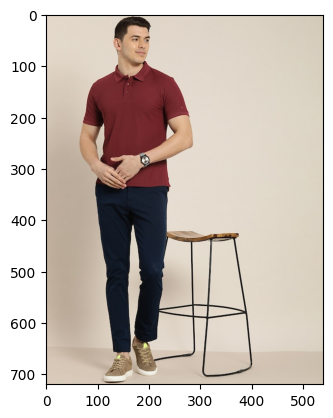

In [ ]:
# Download a sample image
# !gdown 1sJ2YovRYM_66l2LChvn1leEKvS_nCHx-

#Read the sample image
img = cv2.imread('/content/yolo_sample.jpg')

# Show the sample image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), cmap = "gray")


### Use the yolo_detect() function to run inference on the sample input

In [ ]:
yolo_detect('/content/yolo_sample.jpg')

1
0
2


### Plot all the detected clothing accessories

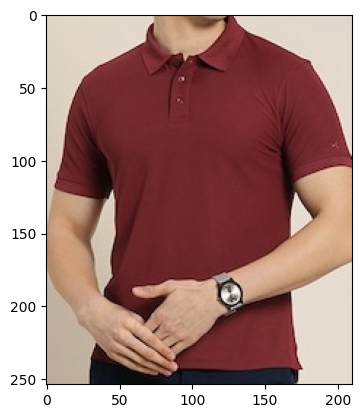

In [ ]:
# Define the image path
img_path = '/content/Topwear.jpg'

# Read the image
img = cv2.imread(img_path)

# Show the image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), cmap = "gray")

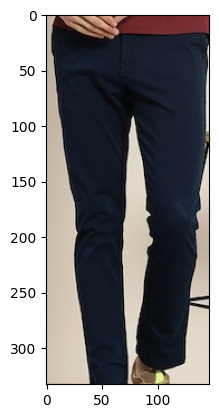

In [ ]:
# Define the image path
img_path = '/content/Bottomwear.jpg'

# Read the image
img = cv2.imread(img_path)

# Show the image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), cmap = "gray")

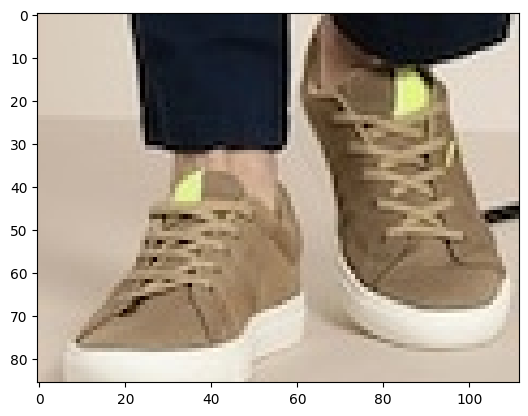

In [ ]:
# Define the image path
img_path = '/content/Footwear.jpg'

# Read the image
img = cv2.imread(img_path)

# Show the image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), cmap = "gray")

In [ ]:
# Importing the necessary dependencies

import numpy as np
from numpy.linalg import norm
import pickle
from tqdm import tqdm, tqdm_notebook
import os
# os.environ["CUDA_VISIBLE_DEVICES"]="2"
import random
import time
import math
import tensorflow as tf
import numpy as np
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import PIL
from PIL import Image
from sklearn.neighbors import NearestNeighbors
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
import glob
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

### Downloading the pre-trained ResNet-50 model alongwith ImageNet weights. For feature extraction, I'll need to remove the FC layers at the end. Thus the model will return a vector containing 2048 features for each image input.

In [ ]:
# Download the ResNet-50 model

model = ResNet50(weights='imagenet',
                         include_top=False,
                         input_shape=(224, 224, 3),
                        pooling='max')

2023-05-17 17:23:14.962253: I tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:736] failed to allocate 19.53MiB (20480000 bytes) from device: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2023-05-17 17:23:14.965791: I tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:736] failed to allocate 19.53MiB (20480000 bytes) from device: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2023-05-17 17:23:24.968300: I tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:736] failed to allocate 19.53MiB (20480000 bytes) from device: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2023-05-17 17:23:24.970368: I tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:736] failed to allocate 19.53MiB (20480000 bytes) from device: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2023-05-17 17:23:24.970413: W tensorflow/tsl/framework/bfc_allocator.cc:485] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.00MiB (rounded to 2097152)requested by op StatelessRandomUniformV2
If the cause is memory 

ResourceExhaustedError: ignored

### You can recall the architecture of ResNet-50 from the Model Summary given below

In [ ]:
# Summary of the ResNet-50 model
model.summary()

### I will use the function given below to extract features from a given image

In [ ]:
# Import OpenCV
import cv2

def extract_features(img_path, model):

    # Define input size
    input_shape = (224, 224, 3)
    # Load the image using the PIL library
    img = image.load_img(img_path, target_size=(input_shape[0], input_shape[1]))
    # Converts a PIL Image instance to a Numpy array
    img_array = image.img_to_array(img)
    # Expand the shape of the array from (224,224,3) to (1,224,224,3)
    expanded_img_array = np.expand_dims(img_array, axis=0)
    # Preprocessing the input to be fed in the ResNet network
    preprocessed_img = preprocess_input(expanded_img_array)
    # Extract features
    features = model.predict(preprocessed_img)
    # Convert the shape of the feature vector from (1,2048) to (2048,)
    flattened_features = features.flatten()
    # Normalize the feature vector
    normalized_features = flattened_features / norm(flattened_features)
    # Return the feature vector
    return normalized_features

In [ ]:
# Download a sample of the scraped dataset

!gdown 1nd_EoEsH7MEN24SEAcpv_v6Zh2GfBQZG
!unzip 'Product.zip'

### Reading data from the metadata.json file which was created during the data collection process.

In [ ]:
# Importing necessary dependencies
import os
import json
import pandas as pd

# Defining the root directory
root_dir = '/content/Product'

# Reading the JSON file using the read_json() method
data_json = pd.read_json(os.path.join(root_dir, 'metadata.json'))


### Displaying the DataFrame

In [ ]:
# Displaying the DataFrame using the head() method
data_json.head()

link         title   
0  https://www.myntra.com/shirts/roadster/roadste...      Roadster  \
1  https://www.myntra.com/sweatshirts/highlander/...    HIGHLANDER   
2  https://www.myntra.com/tshirts/wrogn-active/wr...  WROGN ACTIVE   
3  https://www.myntra.com/shirts/roadster/roadste...      Roadster   
4  https://www.myntra.com/shirts/wrogn/wrogn-men-...         WROGN   

                                                name  price category  sex  
0  Men Black &amp; Grey Checked Pure Cotton Casua...    629  topwear  Men  
1                         Men Blue Hooded Sweatshirt    671  topwear  Men  
2                 Men Black Solid Round Neck T-shirt    494  topwear  Men  
3             Men Blue Faded Denim Sustainable Shirt    899  topwear  Men  
4               Men Blue Slim Fit Faded Casual Shirt   1539  topwear  Men

### Now I will create feature embeddings of each image in our dataset

In [ ]:
import time

# Create an empty list
features = []

# Defining time instance when the loop starts
start = time.time()

# Loop through each row in the dataset
for index, row in data_json.iterrows() :

  # Define the file path for each image
  filepath = os.path.join(root_dir, row['category'], row['name']) + '.jpg'

  # Check if the image exists at the filepath
  if os.path.exists(filepath) :

    # Extract features
    embedding = extract_features(filepath, model)
    # Crate a new list
    embedding_arr = []

    # Loop through the embeddings
    for i in range(len(embedding)) :
      # Append the embeddings from the embedding numpy array to a Python list
      embedding_arr.append(embedding[i])

    # Append the extracted features
    features.append(embedding_arr)

# Defining time instance after the loop ends
end = time.time()

# Display the time taken for feature extraction over the entire dataset
print("Time taken : {} secs".format(round(end-start,2)))

### Now I'll Scale our feature vector

In [ ]:
# Import the StandardScaler class from sklearn library
from sklearn.preprocessing import StandardScaler

# Define an object of the StandardScaler class
scaler = StandardScaler()

# Create a new empty list to store the scaled features
scaled_features = []

# Loop through the embeddings
for embedding in features :

  # Reshape the embedding
  embedding = np.array(embedding).reshape(-1,1)
  # Scale the embedding
  scaled_features.append(scaler.fit_transform(embedding))

# Remove single-dimensional entries from the shape of an array.
scaled_features = np.array(scaled_features).squeeze()

In [ ]:
# Display the length of the dataset
len(scaled_features)

0

### I will now store the feature embeddings for future use

In [ ]:
# Using pickle to store the feature embeddings
import pickle as pkl

# Store the feature embeddings in pickle format
with open('/content/features.pkl','wb') as f:
  pkl.dump(np.array(scaled_features), f)

### Now I will create a function which displays **n** similar images

In [ ]:
# Importing necessary dependencies
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

# Define a function to plot the images
def plot_images(filenames, distances, titles, prices):
    # Create an empty list
    images = []
    # Loop through the filenames
    for filename in filenames:
        # Read the image files
        images.append(mpimg.imread(filename))
    # Create a Plot for displaying images
    plt.figure(figsize=(20, 10))



    # Define the no. of images
    columns = 5
    # Loop through the images
    for i, image in enumerate(images):
        # Create a subplot for the images
        ax = plt.subplot(int(len(images) / columns + 1), columns, i + 1)
        # Set the axis off
        ax.axis('off')
        # Set the name of the image
        ax.set_title(titles[i] + "\nPrice : {} ₹".format(prices[i]), y=-0.05,pad=-14)
        # Display the image inside the subplot
        plt.imshow(image)



# Define a function to display similar images
def find_similar_images(img_path, old_features_path, model, sex = 1) :

  if not os.path.exists(img_path) :
    return None

  # Finding the category of the input image using its path
  category = img_path.split('/')[-1].split('.')[0].lower()

  # Defining the sex attribute for the input image
  if category == 'handbag' :
    sex = "Women"

  else:
    if sex == 1:
      sex = 'Men'
    else:
      sex = 'Women'

  # Extract features from the input image
  new_embedding = extract_features(img_path, model)

  # Define a new list
  new_embedding_arr = []

  # Loop through the emebddings
  for i in range(len(new_embedding)) :
    # Convert the numpy array to a Python list iteratively
    new_embedding_arr.append(new_embedding[i])

  # Make an object of the class StandardScaler()
  scaler = StandardScaler()
  # Scale the extracted features
  new_feature_scaled = scaler.fit_transform(new_embedding.reshape(-1,1))

  # Remove single-dimensional entries from the shape of an array.
  new_feature_scaled = np.array(new_feature_scaled).squeeze()

  # Load the old embeddings from the pre-saved pickle file
  old_features = np.load(old_features_path, allow_pickle = True)

  # Define the NearestNeighbors object for implementing the KNN algorithm
  neighbors = NearestNeighbors(n_neighbors=70, algorithm='brute', metric='euclidean').fit(old_features)
  # Fetch the distances and indices of the 30 closest feature vectors
  distances, indices = neighbors.kneighbors([new_feature_scaled])


  # Define an empty list
  filenames, links, prices, titles = [], [], [], []
  # Define the counter( We'll use this counter to save the first 5 similar images)
  count = 0

  # Loop through the indices
  for index in indices[0] :
    # Apply the conditions for sex and category
    if (data_json.iloc[index,:]['sex']==sex ) and (data_json.iloc[index,:]['category'] == category) :
      # Define the image path
      img_path = os.path.join(root_dir, data_json.iloc[index,:]['category'], data_json.iloc[index,:]['name']) + '.jpg'

      # Check if the path exists
      if os.path.exists(img_path) :
        # Add the image path to the list if it exists
        filenames.append(img_path)

        links.append(data_json.iloc[index,:]['link'])
        titles.append(data_json.iloc[index,:]['title'])
        prices.append(data_json.iloc[index,: ]['price'])
        # Increment the counter
        count += 1

    # Break the loop if the counter reaches 5
    if count==5 :
      break

  # Use the plot_images function to display the similar image
  plot_images(filenames, distances, titles, prices)


1/1 [==============================] - 0s 29ms/step
CPU times: user 6.71 s, sys: 1.16 s, total: 7.87 s
Wall time: 456 ms


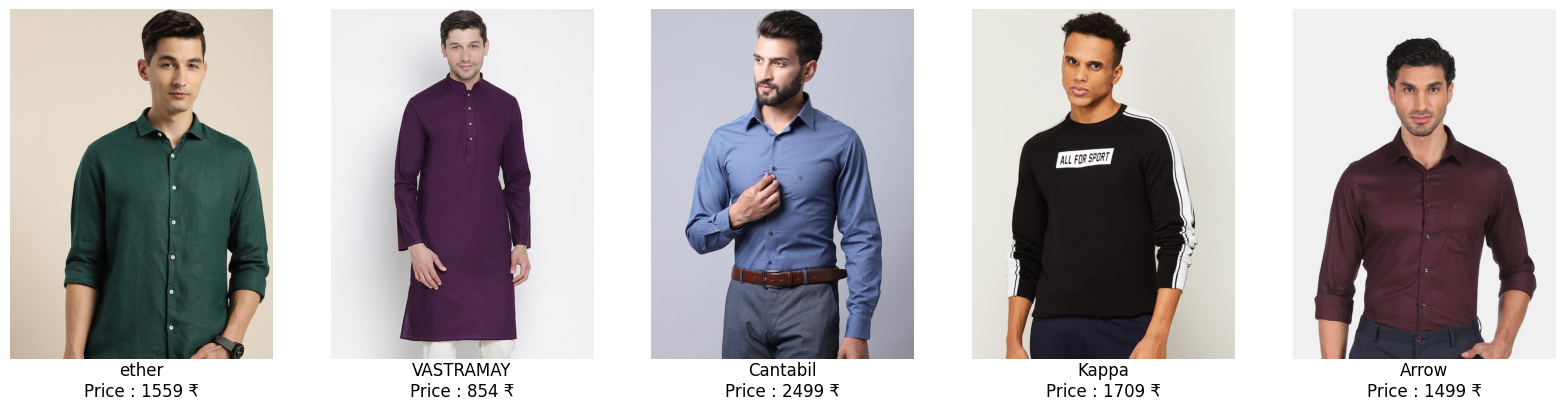

In [ ]:
%time find_similar_images('/content/Topwear.jpg', '/content/features.pkl', model, 1)

1/1 [==============================] - 0s 29ms/step
CPU times: user 6.69 s, sys: 591 ms, total: 7.28 s
Wall time: 435 ms


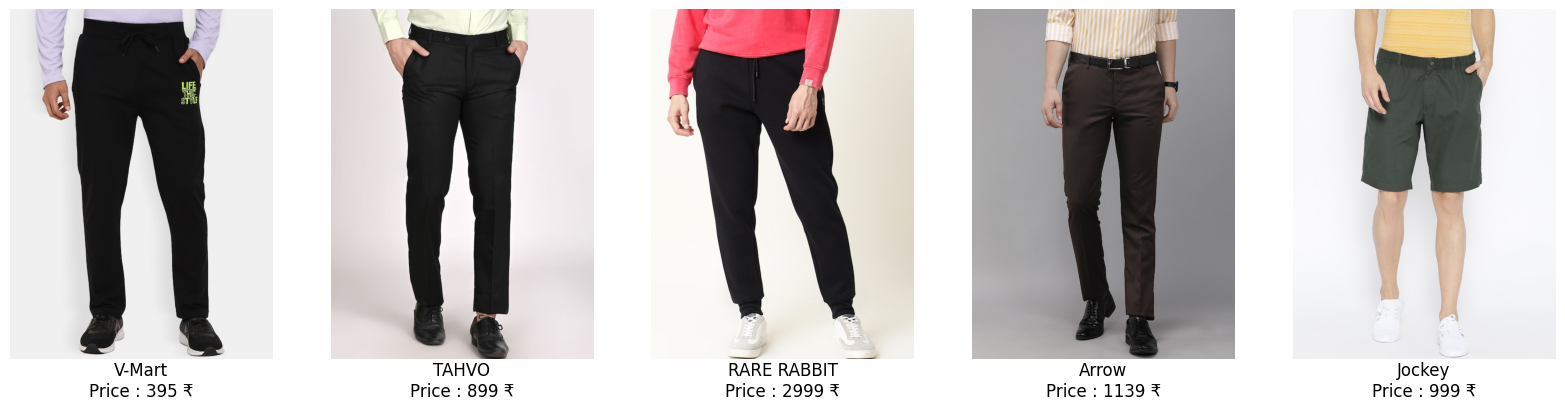

In [ ]:
%time find_similar_images('/content/Bottomwear.jpg', '/content/features.pkl', model, 1)

1/1 [==============================] - 0s 30ms/step
CPU times: user 6.52 s, sys: 789 ms, total: 7.31 s
Wall time: 431 ms


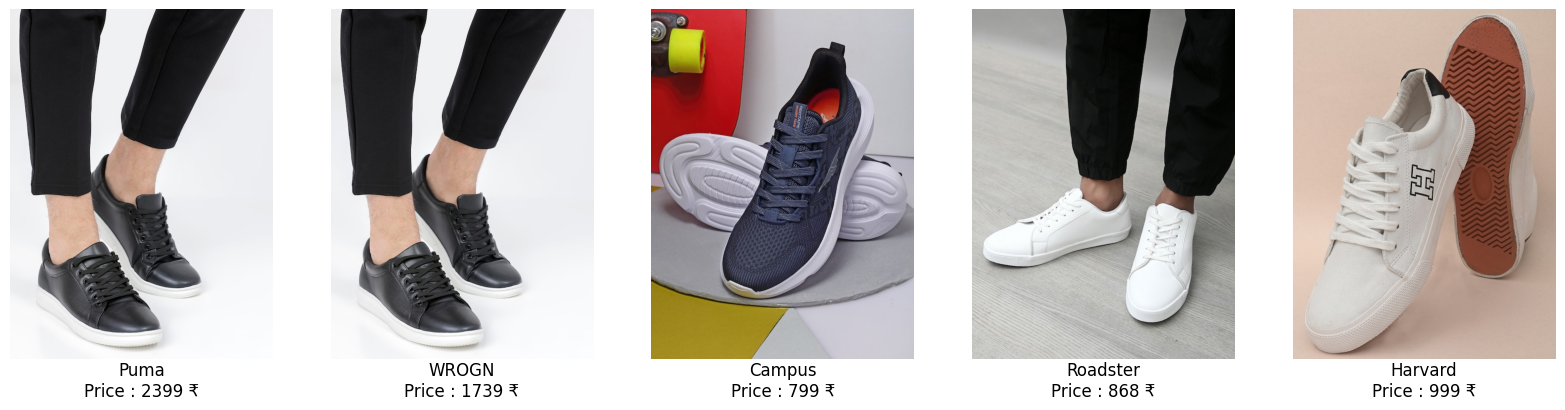

In [ ]:
%time find_similar_images('/content/Footwear.jpg', '/content/features.pkl', model, 1)

In [ ]:
# Function to execute the whole pipeline
def recommend(img_path, old_features_path, model, sex = 1) :

  # Step 1 : Check if the image is full-shot

  # Create an object of the PoseEstimation class
  ps = PoseEstimation()
  # Checking if the image is full-shot
  full_shot, _, _ =  ps.pose_estimation(img_path)

  # Proceed if the image is full-shot
  if full_shot :

    # Defining the path for all accessories
    accessory_paths = ['/content/Topwear.jpg', '/content/Footwear.jpg', '/content/Bottomwear.jpg', '/content/Handbag.jpg']

    # Loop through the accessory paths
    for path in accessory_paths :
      # Check if the path exists
      if os.path.exists(path) :
        # Remove the files if they exist
        os.remove(path)

    # Perform custom object detection on the objects
    yolo_detect(img_path)

    # Loop through the accessory paths
    for path in accessory_paths :
      # Check if the path exists
      if os.path.exists(path) :
        # Find the similar images
        find_similar_images(path, old_features_path, model, sex)

  else:
    # Ask the user to upload a full-shot image
    print("Please upload a full-shot image")



### Let's now test our project on some sample images.

In [ ]:
# Downloading some sample test images

!gdown 1gLZqv9M4Gh4-qTMUAy1Pt1DNYLJqcmIE
!gdown 1A8NJMTpb2Z5M1yeORMO-Bu4IAABmaGd
!gdown 1e2Mc_GMyvNY1TgZiSk8K-qGeQX75rJ51

/root/miniconda3/lib/python3.10/site-packages/google/protobuf/symbol_database.py:78: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Image is full-shot 

1
0
2
1/1 [==============================] - 0s 22ms/step
CPU times: user 22.3 s, sys: 3.18 s, total: 25.5 s
Wall time: 2.31 s


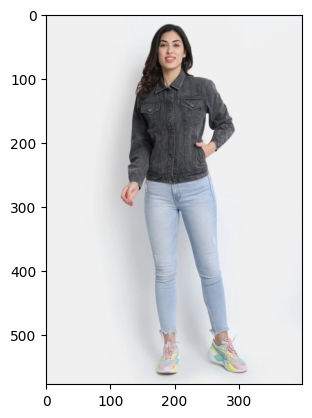

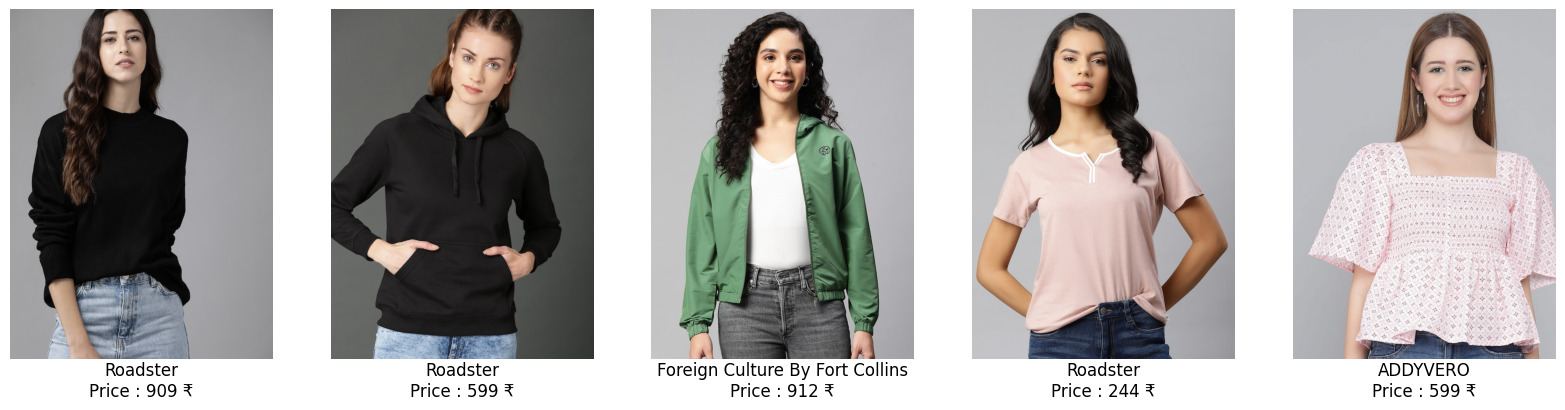

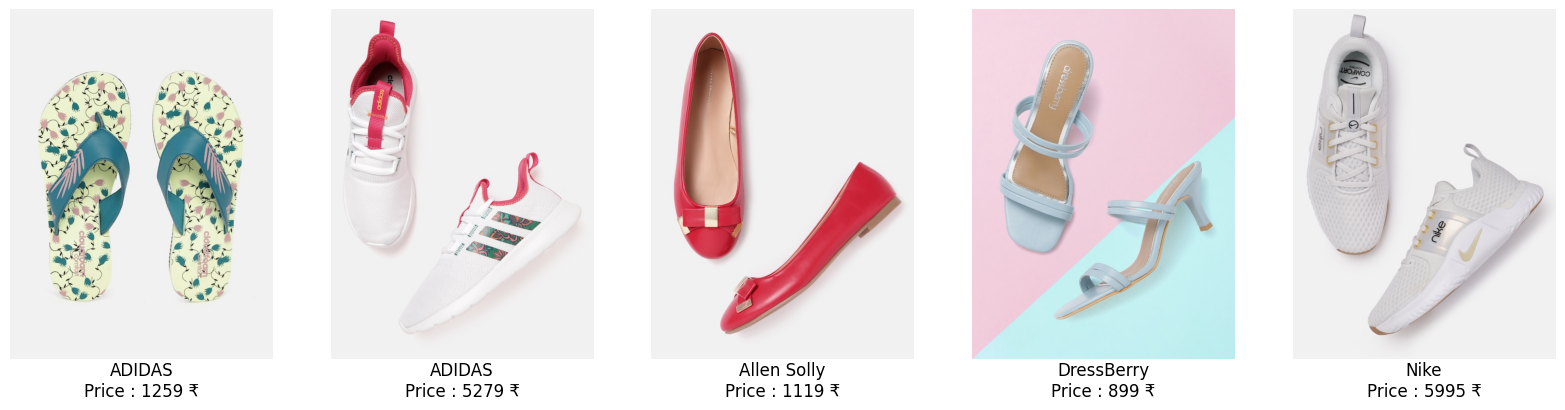

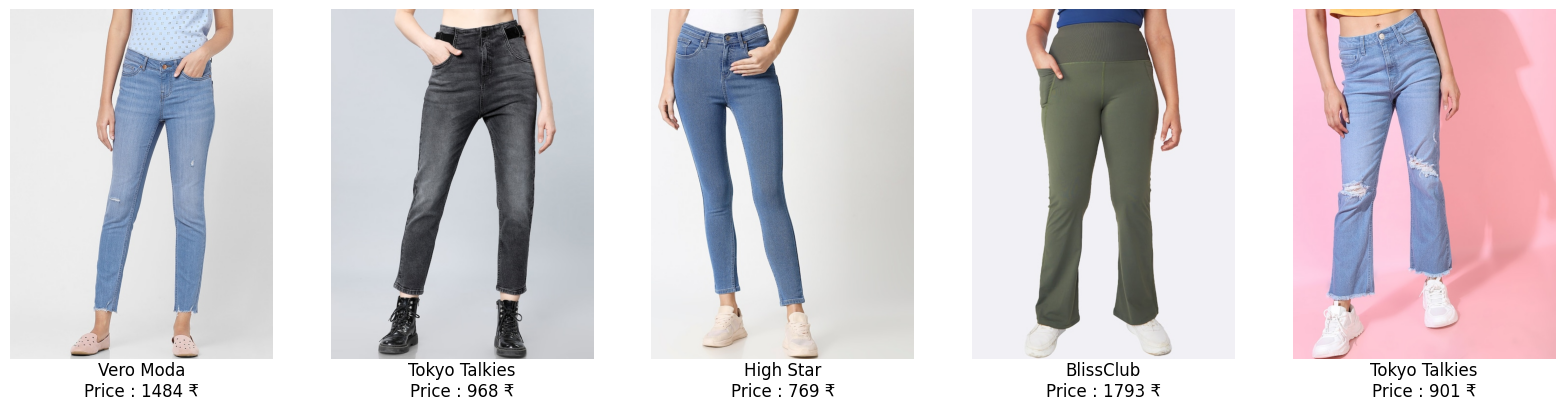

In [ ]:
# Read the image file
img = cv2.imread('/content/test_1.jpg')
# Display the image file
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), cmap = "gray")

# Execute the recommend function
%time recommend('/content/test_1.jpg', '/content/features.pkl', model, 0)

Image is full-shot 

0
1
2
1/1 [==============================] - 0s 22ms/step


/root/miniconda3/lib/python3.10/site-packages/google/protobuf/symbol_database.py:78: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


1/1 [==============================] - 0s 22ms/step
CPU times: user 22.5 s, sys: 3.17 s, total: 25.7 s
Wall time: 1.51 s


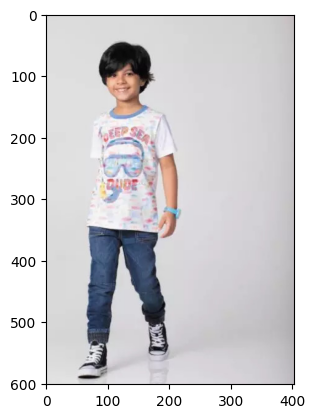

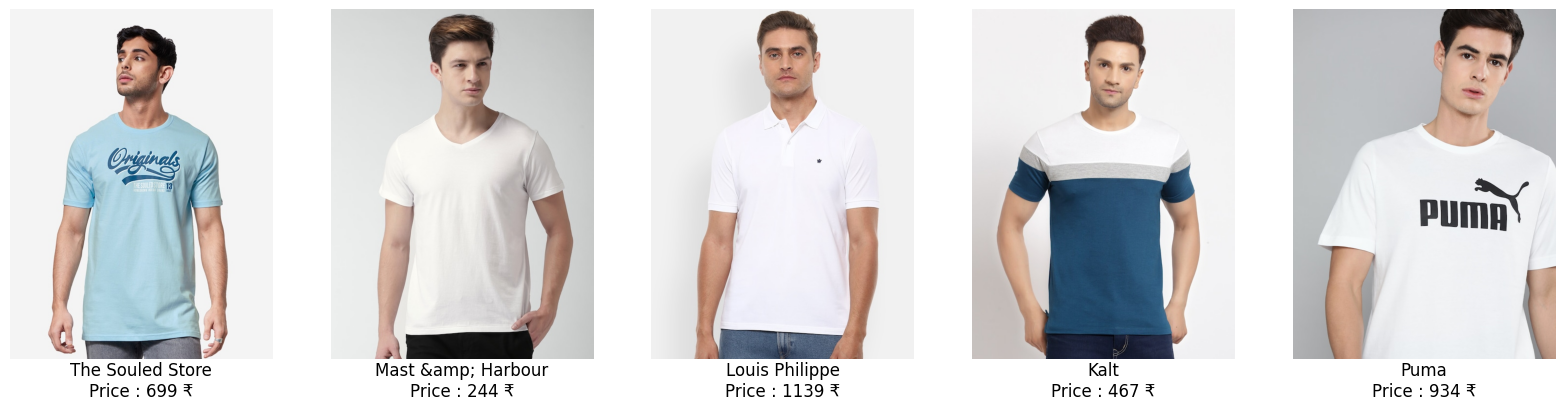

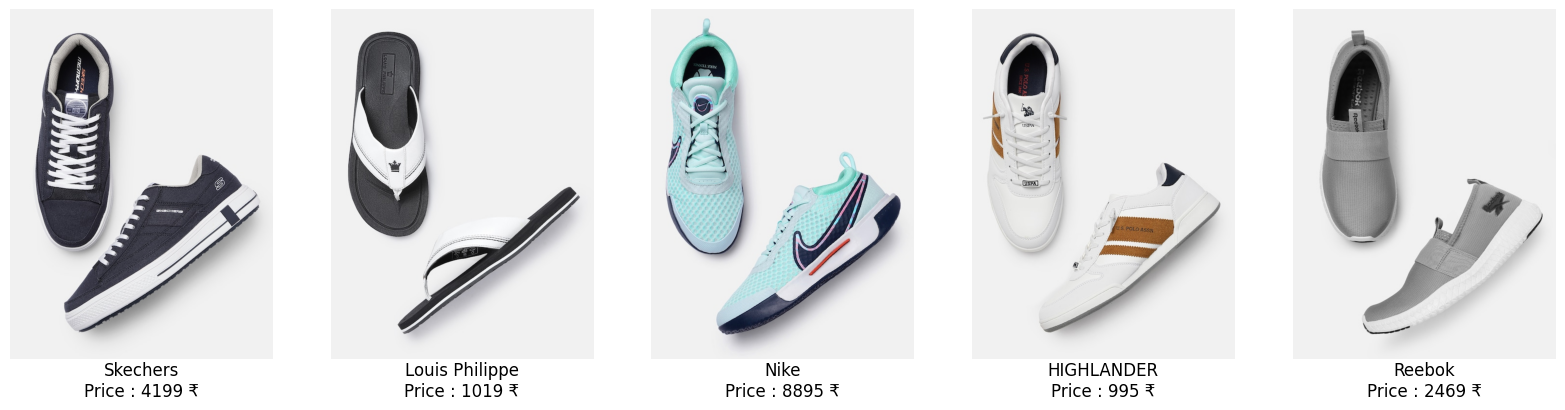

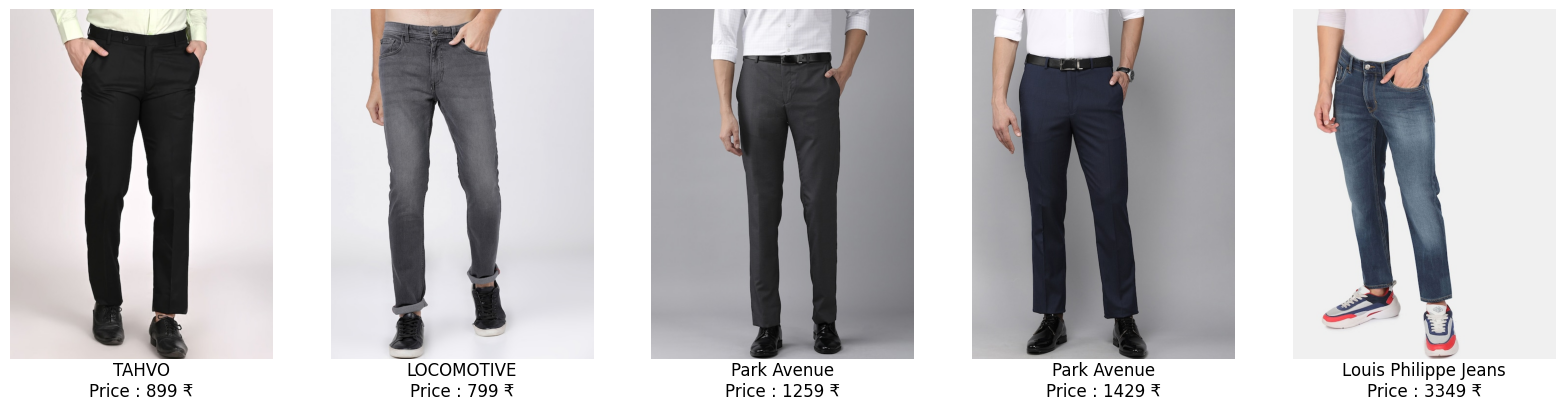

In [ ]:
# Read the image file
img = cv2.imread('/content/test_3.jpg')
# Display the image file
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), cmap = "gray")

# Execute the recommend function
%time recommend('/content/test_3.jpg', '/content/features.pkl', model, 1)